In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
%matplotlib inline

# 学習データをロード

In [2]:
%%time
Data_train  = pd.read_csv('./trafic_data/trafic_data_alpha.csv', header=None)

CPU times: user 542 ms, sys: 54.8 ms, total: 597 ms
Wall time: 600 ms


In [3]:
Data_train.columns = list(range(1, 401)) + ['alpha']

In [4]:
Data_train.head()

,1,2,3,4,5,6,7,8,9,10,...,392,393,394,395,396,397,398,399,400,alpha
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0.10000
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.10009
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0.10018
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0.10027
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.10036


In [5]:
Data_train.shape

(10000, 401)

In [6]:
X_train = Data_train.iloc[:, :-1]
X_train.shape

(10000, 400)

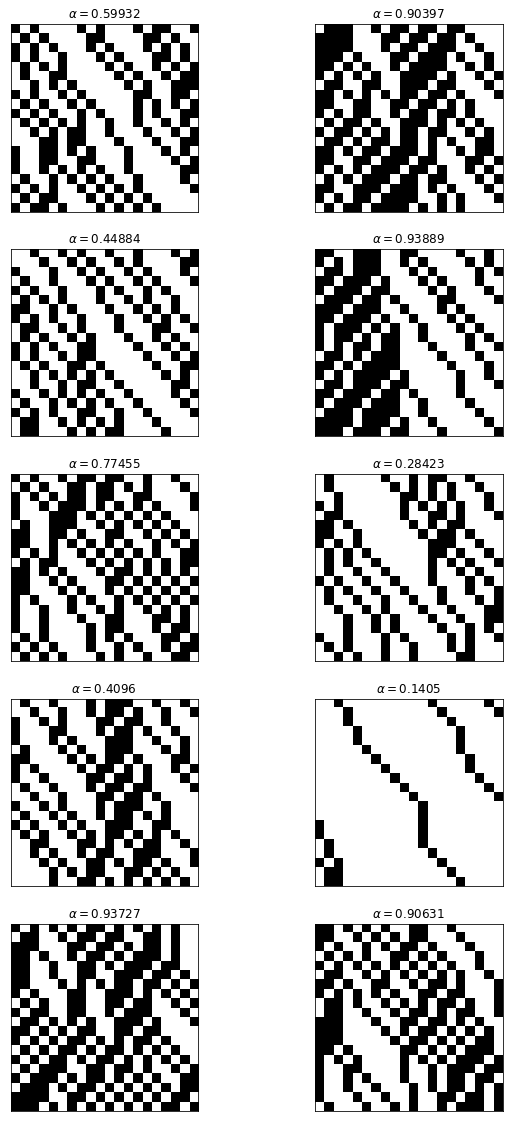

In [7]:
# 中身を10枚見てみる
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))
for idx_ax, idx_x in zip(itertools.product(list(range(0, 5)), [0, 1]),
                          np.random.permutation(Data_train.index)[:10]):
    ax[idx_ax[0], idx_ax[1]].imshow(Data_train.iloc[idx_x, :-1].values.reshape(20, 20), cmap=plt.cm.gray_r)
    ax[idx_ax[0], idx_ax[1]].set_xticks([])
    ax[idx_ax[0], idx_ax[1]].set_yticks([])
    ax[idx_ax[0], idx_ax[1]].set_title(r'$\alpha = {:.5}$'.format((Data_train.iloc[idx_x, -1])))

## $\alpha < \alpha_c = 0.5$ にデータにラベル0, $\alpha \geq \alpha_c = 0.5$にラベル1をふる

In [28]:
# 取りうるalphaの値
np.unique(Data_train.iloc[:, -1])

array([ 0.1    ,  0.10009,  0.10018, ...,  0.99973,  0.99982,  0.99991])

In [8]:
alpha_c = 0.5
y_train = pd.Series([0 if alpha < alpha_c else 1 for alpha in Data_train.iloc[:, -1]]).ravel()

In [30]:
np.bincount(y_train)

array([4445, 5555])

In [31]:
np.unique(y_train)

array([0, 1])

# テストデータを読み込む

In [9]:
# テストデータを読み込む
Data_test = pd.read_csv('./trafic_data/trafic_data_alpha-test.csv', header=None)
Data_test.shape

(3000, 401)

In [10]:
X_test = Data_test.iloc[:,:-1]
X_test.shape

(3000, 400)

In [11]:
Data_test.columns = list(range(1, 401)) + ['alpha']

In [12]:
Data_test.head()

,1,2,3,4,5,6,7,8,9,10,...,392,393,394,395,396,397,398,399,400,alpha
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0.1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0.1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.1


## $\alpha < \alpha_c = 0.5$ にデータにラベル0, $\alpha \geq \alpha_c = 0.5$にラベル1をふる

In [35]:
# 取りうるalphaの値
np.unique(Data_test.iloc[:, -1])

array([ 0.1  ,  0.115,  0.13 ,  0.145,  0.16 ,  0.175,  0.19 ,  0.205,
        0.22 ,  0.235,  0.25 ,  0.265,  0.28 ,  0.295,  0.31 ,  0.325,
        0.34 ,  0.355,  0.37 ,  0.385,  0.4  ,  0.415,  0.43 ,  0.445,
        0.46 ,  0.475,  0.49 ,  0.505,  0.52 ,  0.535,  0.55 ,  0.565,
        0.58 ,  0.595,  0.61 ,  0.625,  0.64 ,  0.655,  0.67 ,  0.685,
        0.7  ,  0.715,  0.73 ,  0.745,  0.76 ,  0.775,  0.79 ,  0.805,
        0.82 ,  0.835,  0.85 ,  0.865,  0.88 ,  0.895,  0.91 ,  0.925,
        0.94 ,  0.955,  0.97 ,  0.985])

In [13]:
y_test = pd.Series([0 if alpha < alpha_c else 1 for alpha in Data_test.iloc[:, -1]]).ravel()

In [14]:
np.bincount(y_test)

array([1350, 1650])

In [38]:
np.unique(y_test)

array([0, 1])

# MLP で識別

In [15]:
from sklearn.neural_network import MLPClassifier

## 隠れそう1層　隠れ素子100

In [16]:
mlp_100 = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
                       alpha=0.0001, random_state=0)
# alpha: 正則化係数　大きいほど正則かが強く働く
# random_state=0

In [47]:
%%time
 mlp_100.fit(X_train, y_train)

CPU times: user 17.6 s, sys: 734 ms, total: 18.3 s
Wall time: 9.23 s


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [48]:
mlp_100.score(X_test, y_test)

0.8736666666666667

In [57]:
accuracy_100 = []
alphas=np.unique(Data_test.iloc[:, -1])
for alpha in alphas:
    accuracy_100.append(mlp_100.score(Data_test.values[Data_test.loc[:, 'alpha']==alpha, :-1], 
                             y_test.ravel()[Data_test.loc[:, 'alpha']==alpha]))

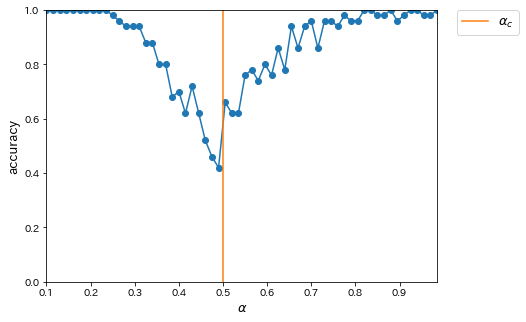

In [58]:
plt.figure(figsize=(7, 5))
plt.plot(alphas, accuracy_100, marker='o')
plt.axvline(x=alpha_c, c=plt.cm.tab10(1), label=r'$\alpha_c$')
plt.xlim(alphas.min(), alphas.max())
plt.ylim(0.0, 1.0)
plt.xlabel(r'$\alpha$', fontsize=13)
plt.ylabel('accuracy', fontsize=13)
plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left',
           borderaxespad=0, fontsize=13)

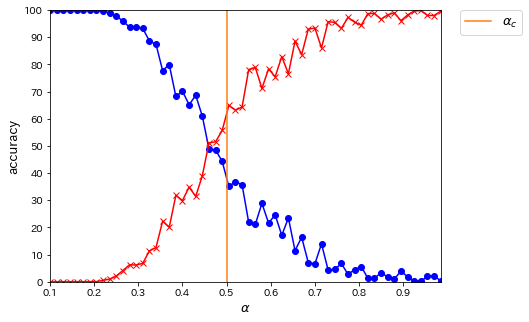

In [127]:
probabilities_0 = []

for alpha in alphas:
    probabilities_0.append(mlp_100.predict_proba(Data_test.values[Data_test.loc[:, 'alpha']==alpha, :-1])[:, 0].mean())
probabilities_0 = np.array(probabilities_0)

probabilities_1 = []

for alpha in alphas:
    probabilities_1.append(mlp_100.predict_proba(Data_test.values[Data_test.loc[:, 'alpha']==alpha, :-1])[:, 1].mean())
probabilities_1 = np.array(probabilities_1)

fig, ax = plt.subplots(1,1,figsize=(7, 5))
ax.plot(alphas, probabilities_0*100, marker='o', c='b')
ax.plot(alphas, probabilities_1*100, marker='x', c='r')
ax.axvline(x=alpha_c, c=plt.cm.tab10(1), label=r'$\alpha_c$')
ax.set_xlim(alphas.min(), alphas.max())
ax.set_ylim(0, 100)
ax.set_xlabel(r'$\alpha$', fontsize=13)
ax.set_ylabel('accuracy', fontsize=13)
ax.set_yticks([i*10 for i in range(11)])
ax.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left',
          borderaxespad=0, fontsize=13)

## 隠れそう1層　隠れ素子３

In [17]:
mlp_3 = MLPClassifier(hidden_layer_sizes=(3,), activation='relu',
                       alpha=0.0001, random_state=0)# alpha: 正則化係数　大きいほど正則かが強く働く

In [63]:
%%time
mlp_3.fit(X_train, y_train)

CPU times: user 7.78 s, sys: 732 ms, total: 8.51 s
Wall time: 4.3 s


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [64]:
mlp_3.score(X_test, y_test)

0.88500000000000001

### mlp_3に対してGrifdSearch を行う (alphaについてのみ)

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
alphas = [10**(i) for i in range(-3, 3)]
alphas

[0.001, 0.01, 0.1, 1, 10, 100]

In [20]:
param_grid={'alpha' : alphas}
param_grid

{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [21]:
gs_3 = GridSearchCV(estimator=mlp_3, param_grid=param_grid, 
                 cv=5, n_jobs=-1, verbose=2)

In [22]:
gs_3.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] alpha=0.001 .....................................................
[CV] alpha=0.001 .....................................................
[CV] alpha=0.001 .....................................................
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   6.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   7.0s
[CV] alpha=0.01 ......................................................
[CV] ...................................... alpha=0.001, total=   7.2s
[CV] alpha=0.01 ......................................................
[CV] ...................................... alpha=0.001, total=  11.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   6.9s
[CV] alpha=0.01 .

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   56.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [23]:
gs_3.best_score_

0.86119999999999997

In [24]:
gs_3.best_params_

{'alpha': 10}

In [25]:
pd.DataFrame(gs_3.cv_results_)

/Users/yohei/.pyenv/versions/anaconda3-5.0.0/envs/tensorflow/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/yohei/.pyenv/versions/anaconda3-5.0.0/envs/tensorflow/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/yohei/.pyenv/versions/anaconda3-5.0.0/envs/tensorflow/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training score

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,7.879079,0.006968,0.8564,0.918025,0.001,{'alpha': 0.001},5,0.8160,0.925000,0.9235,...,0.9460,0.894000,0.8675,0.911000,0.7290,0.949375,1.706821,0.001254,0.078124,0.018498
1,7.874148,0.004776,0.8574,0.917875,0.01,{'alpha': 0.01},4,0.8160,0.924625,0.9250,...,0.9480,0.894125,0.8670,0.910125,0.7310,0.949750,1.549780,0.000169,0.078181,0.018636
2,7.526164,0.004981,0.8583,0.917225,0.1,{'alpha': 0.1},2,0.8185,0.925500,0.9280,...,0.9450,0.893500,0.8690,0.911000,0.7310,0.949875,0.588237,0.000608,0.077819,0.019270
3,7.635732,0.005080,0.8582,0.914750,1,{'alpha': 1},3,0.8160,0.925375,0.9290,...,0.9570,0.892125,0.8485,0.905500,0.7405,0.947250,1.024799,0.000442,0.078105,0.019458
4,8.548674,0.004697,0.8612,0.904500,10,{'alpha': 10},1,0.8645,0.912750,0.9540,...,0.9605,0.886875,0.8440,0.898750,0.6830,0.932125,0.947673,0.000136,0.100533,0.016317
5,4.539968,0.004909,0.8376,0.847550,100,{'alpha': 100},6,0.9710,0.831250,0.9765,...,0.9035,0.840750,0.7150,0.857875,0.6220,0.894750,0.270129,0.000952,0.143489,0.027682


In [26]:
gs_3.best_params_

{'alpha': 10}

In [27]:
gs_3.score(X_test, y_test)

0.88966666666666672

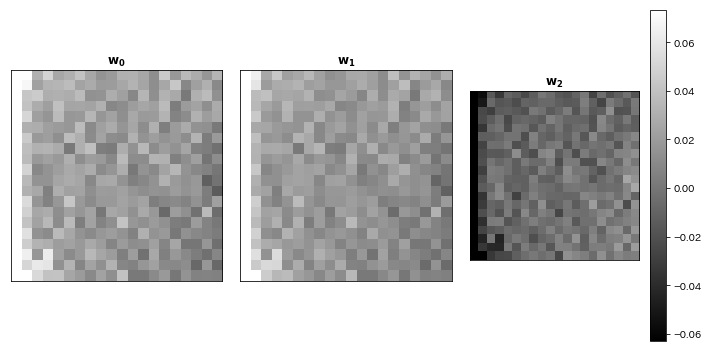

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
# use global min / max to ensure all weights are shown on the same scale
# vmin, vmax = gs_3.best_estimator_.coefs_[0].min(), gs_3.best_estimator_.coefs_[0].max()
i=0
for coef, ax in zip(gs_3.best_estimator_.coefs_[0].T, axes.ravel()):
    hoge = ax.imshow(coef.reshape(20, 20), cmap=plt.cm.gray,vmin=.5 * vmin,vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(r'$\bfw_{}$'.format(i))
    i+=1
plt.colorbar(hoge)
plt.tight_layout()

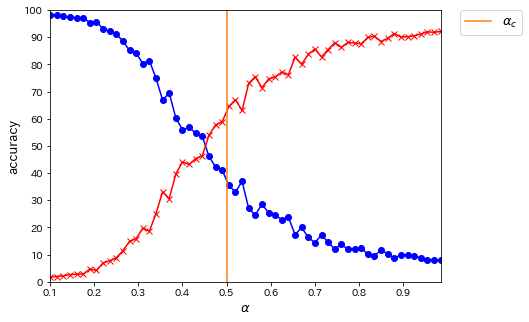

In [126]:
alphas = np.unique(Data_test.loc[:,'alpha'])

probabilities_0 = []

for alpha in alphas:
    probabilities_0.append(gs_3.best_estimator_.predict_proba(Data_test.values[Data_test.loc[:, 'alpha']==alpha, :-1])[:, 0].mean())
probabilities_0 = np.array(probabilities_0)

probabilities_1 = []

for alpha in alphas:
    probabilities_1.append(gs_3.best_estimator_.predict_proba(Data_test.values[Data_test.loc[:, 'alpha']==alpha, :-1])[:, 1].mean())
probabilities_1 = np.array(probabilities_1)

fig, ax = plt.subplots(1,1,figsize=(7, 5))
ax.plot(alphas, probabilities_0*100, marker='o', c='b')
ax.plot(alphas, probabilities_1*100, marker='x', c='r')
ax.axvline(x=alpha_c, c=plt.cm.tab10(1), label=r'$\alpha_c$')
ax.set_xlim(alphas.min(), alphas.max())
ax.set_ylim(0, 100)
ax.set_xlabel(r'$\alpha$', fontsize=13)
ax.set_ylabel('accuracy', fontsize=13)
ax.set_yticks([i*10 for i in range(11)])
ax.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left',
          borderaxespad=0, fontsize=13)

## 隠れそう1層　隠れ素子2

In [69]:
mlp_2 = MLPClassifier(hidden_layer_sizes=(2,), activation='relu',
                       alpha=0.0001, random_state=0)

In [94]:
%%time
mlp_2.fit(X_train, y_train)

CPU times: user 8.17 s, sys: 806 ms, total: 8.97 s
Wall time: 4.54 s


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [95]:
mlp_2.score(X_test, y_test)

0.87

In [70]:
alphas = [10**(i) for i in range(-5, 5)]
param_grid={'alpha' : alphas}
param_grid
gs_2 = GridSearchCV(estimator=mlp_2, param_grid=param_grid, 
                 cv=5, n_jobs=-1, verbose=2)

In [71]:
gs_2.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=1e-05 .....................................................
[CV] alpha=1e-05 .....................................................
[CV] alpha=1e-05 .....................................................
[CV] alpha=1e-05 .....................................................
[CV] ...................................... alpha=1e-05, total=  11.3s
[CV] alpha=1e-05 .....................................................
[CV] ...................................... alpha=1e-05, total=  11.9s
[CV] alpha=0.0001 ....................................................
[CV] ...................................... alpha=1e-05, total=  13.6s
[CV] alpha=0.0001 ....................................................
[CV] ...................................... alpha=1e-05, total=  14.3s
[CV] alpha=0.0001 ....................................................
[CV] ...................................... alpha=1e-05, total=  10.6s
[CV] alpha=0.000

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min


[CV] ......................................... alpha=10, total=  12.8s
[CV] alpha=100 .......................................................
[CV] ........................................ alpha=100, total=  10.0s
[CV] alpha=100 .......................................................


/Users/yohei/.pyenv/versions/anaconda3-5.0.0/envs/tensorflow/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ......................................... alpha=10, total=  15.7s
[CV] alpha=100 .......................................................
[CV] ........................................ alpha=100, total=  10.5s
[CV] alpha=1000 ......................................................
[CV] ........................................ alpha=100, total=  10.1s
[CV] alpha=1000 ......................................................
[CV] ....................................... alpha=1000, total=   2.3s
[CV] alpha=1000 ......................................................
[CV] ....................................... alpha=1000, total=   2.4s
[CV] alpha=1000 ......................................................
[CV] ....................................... alpha=1000, total=   2.3s
[CV] alpha=1000 ......................................................
[CV] ....................................... alpha=1000, total=   2.4s
[CV] alpha=10000 .....................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [72]:
gs_2.best_params_

{'alpha': 10}

In [99]:
pd.DataFrame(gs_2.cv_results_)

/Users/yohei/.pyenv/versions/anaconda3-5.0.0/envs/tensorflow/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/yohei/.pyenv/versions/anaconda3-5.0.0/envs/tensorflow/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/yohei/.pyenv/versions/anaconda3-5.0.0/envs/tensorflow/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training score

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,13.847333,0.010093,0.8349,0.932225,1e-05,{'alpha': 1e-05},5,0.7930,0.941625,0.9155,...,0.9140,0.916375,0.8535,0.932500,0.6985,0.953125,1.071403,0.003186,0.081804,0.014095
1,13.234028,0.005352,0.8303,0.930625,0.0001,{'alpha': 0.0001},8,0.7980,0.942750,0.9125,...,0.9180,0.918625,0.8200,0.919625,0.7030,0.953250,2.351601,0.002066,0.079753,0.014574
2,12.062239,0.003080,0.8308,0.931475,0.001,{'alpha': 0.001},7,0.7890,0.943875,0.9120,...,0.9150,0.915375,0.8315,0.926750,0.7065,0.954000,1.444235,0.000200,0.078589,0.015109
3,12.419175,0.003546,0.8361,0.930750,0.01,{'alpha': 0.01},4,0.8015,0.942375,0.9145,...,0.9150,0.914125,0.8490,0.928375,0.7005,0.952875,1.399852,0.000519,0.080153,0.014995
4,11.656676,0.003337,0.8377,0.929500,0.1,{'alpha': 0.1},3,0.8135,0.938625,0.9225,...,0.9075,0.909750,0.8375,0.925250,0.7075,0.955625,1.359694,0.000532,0.076943,0.016127
5,10.481538,0.003210,0.8331,0.921375,1,{'alpha': 1},6,0.7720,0.932000,0.8790,...,0.9425,0.902750,0.8645,0.917500,0.7075,0.949250,1.198355,0.000544,0.083150,0.017366
6,15.529245,0.003087,0.8610,0.909625,10,{'alpha': 10},1,0.8175,0.922375,0.9450,...,0.9580,0.886250,0.8765,0.904375,0.7080,0.939000,1.254045,0.000365,0.091659,0.018877
7,11.495164,0.003158,0.8543,0.866675,100,{'alpha': 100},2,0.9525,0.855625,0.9795,...,0.9140,0.847000,0.7760,0.877125,0.6495,0.912375,0.938763,0.000380,0.124062,0.025897
8,2.489736,0.003715,0.5555,0.555500,1000,{'alpha': 1000},9,0.5555,0.555500,0.5555,...,0.5555,0.555500,0.5555,0.555500,0.5555,0.555500,0.051431,0.000917,0.000000,0.000000
9,2.738096,0.003298,0.5555,0.555500,10000,{'alpha': 10000},9,0.5555,0.555500,0.5555,...,0.5555,0.555500,0.5555,0.555500,0.5555,0.555500,0.314391,0.000555,0.000000,0.000000


In [73]:
gs_2.score(X_test, y_test)

0.88933333333333331

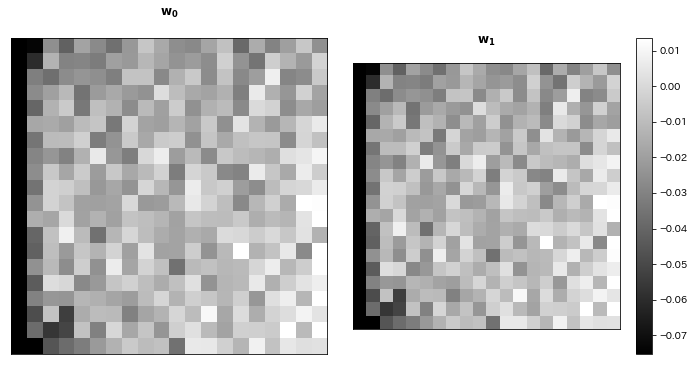

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = gs_2.best_estimator_.coefs_[0].min(), gs_2.best_estimator_.coefs_[0].max()
i=0
for coef, ax in zip(gs_2.best_estimator_.coefs_[0].T, axes.ravel()):
    hoge = ax.matshow(coef.reshape(20, 20), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(r'$\bfw_{}$'.format(i))
    i+=1
plt.colorbar(hoge)
plt.tight_layout()

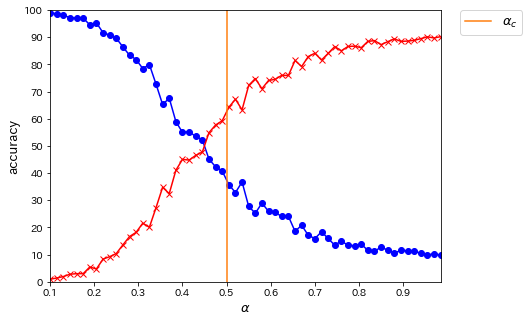

In [109]:
alphas = np.unique(Data_test.loc[:,'alpha'])

probabilities_0 = []

for alpha in alphas:
    probabilities_0.append(gs_2.best_estimator_.predict_proba(Data_test.values[Data_test.loc[:, 'alpha']==alpha, :-1])[:, 0].mean())
probabilities_0 = np.array(probabilities_0)

probabilities_1 = []

for alpha in alphas:
    probabilities_1.append(gs_2.best_estimator_.predict_proba(Data_test.values[Data_test.loc[:, 'alpha']==alpha, :-1])[:, 1].mean())
probabilities_1 = np.array(probabilities_1)

fig, ax = plt.subplots(1,1,figsize=(7, 5))
ax.plot(alphas, probabilities_0*100, marker='o', c='b')
ax.plot(alphas, probabilities_1*100, marker='x', c='r')
ax.axvline(x=alpha_c, c=plt.cm.tab10(1), label=r'$\alpha_c$')
ax.set_xlim(alphas.min(), alphas.max())
ax.set_ylim(0, 100)
ax.set_xlabel(r'$\alpha$', fontsize=13)
ax.set_ylabel('accuracy', fontsize=13)
ax.set_yticks([i*10 for i in range(11)])
ax.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left',
          borderaxespad=0, fontsize=13)

## 隠れそう1層　隠れ素子1

In [75]:
mlp_1 = MLPClassifier(hidden_layer_sizes=(1,), activation='relu',
                       alpha=0.0001, random_state=0)

In [76]:
%%time
mlp_1.fit(X_train, y_train)

CPU times: user 6.29 s, sys: 714 ms, total: 7 s
Wall time: 3.62 s


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [131]:
mlp_1.score(X_test, y_test)

0.88633333333333331

In [77]:
alphas = [10**(i) for i in range(-3, 3)]
param_grid={'alpha' : alphas}
param_grid
gs_1 = GridSearchCV(estimator=mlp_1, param_grid=param_grid, 
                 cv=5, n_jobs=-1, verbose=2)

In [78]:
gs_1.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] alpha=0.001 .....................................................
[CV] alpha=0.001 .....................................................
[CV] alpha=0.001 .....................................................
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   6.5s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   6.7s
[CV] alpha=0.01 ......................................................
[CV] ...................................... alpha=0.001, total=   8.1s
[CV] alpha=0.01 ......................................................
[CV] ...................................... alpha=0.001, total=   9.2s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   8.3s
[CV] alpha=0.01 .

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   53.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [79]:
gs_1.best_params_

{'alpha': 1}

In [80]:
gs_1.score(X_test, y_test)

0.89000000000000001

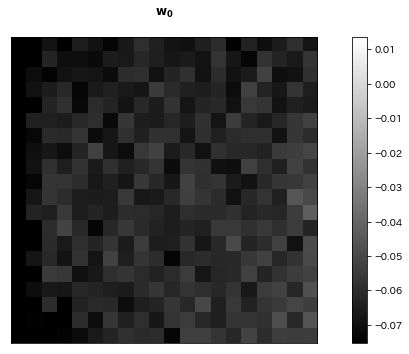

In [81]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = gs_1.best_estimator_.coefs_[0].min(), gs_1.best_estimator_.coefs_[0].max()
i=0
for coefin in gs_1.best_estimator_.coefs_[0].T:
    axes.matshow(coef.reshape(20, 20), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    axes.set_xticks(())
    axes.set_yticks(())
    axes.set_title(r'$\bfw_{}$'.format(i))
    i+=1
plt.colorbar(hoge)
plt.tight_layout()

$\alpha_c$ = 1/4
となるような$p$で作ったデータをテストデータとして識別してみる．


普通は間違えるはずだが，どうなるか見てみる．